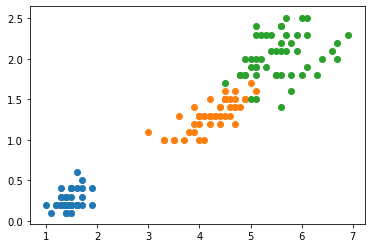

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
#查看决策边界

def plot_decision_boundary(model, axis):
 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
 
    # 用预测函数预测一下
    y_predict = model.predict(np.c_[x0.ravel(), x1.ravel()])
    zz = y_predict.reshape(x0.shape)
 
    # 然后画出图
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

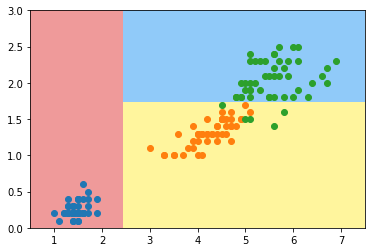

In [11]:
plot_decision_boundary(dt_clf, axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

**决策树特点：**

1. 非参数学习算法

2. 天然可以解决多分类问题

3. 也可以解决回归问题

4. 具有良好的可解释性

## 信息熵

### 熵代表着不确定性的度量。熵越大，数据不确定性越高

### 决策树划分后使得信息熵降低

### 计算公式：$H=-\sum_{i=1}^kp_ilog(p_i)$ 

In [12]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

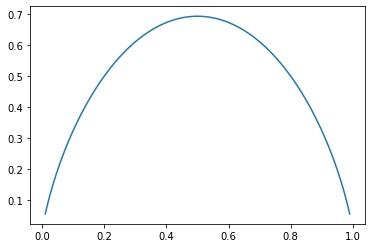

In [13]:
x = np.linspace(0.01, 0.99, 200)
plt.plot(x, entropy(x))
plt.show()

In [17]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l)+entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                    
    return best_entropy, best_d, best_v

In [18]:
best_entropy, best_d, best_v = try_split(X, y)

print("best_entropy = ", best_entropy)
print("best_d = ", best_d)
print("best_v = ", best_v)

#在第0个维度的2.45处进行划分

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.45


## 基尼系数

### 与信息熵性质相似

### 计算公式：$G=1-\sum_{i=1}^kp_i^2$

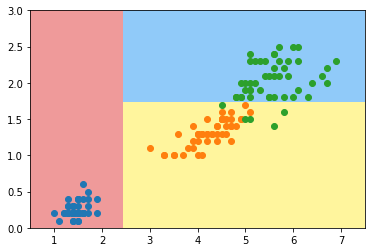

In [14]:
dt_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

### 信息熵的计算比基尼系数的速度较慢

### sklearn中默认基尼系数

### 二者效果没有明显区别

***
## 剪枝

### 降低复杂度，解决过拟合

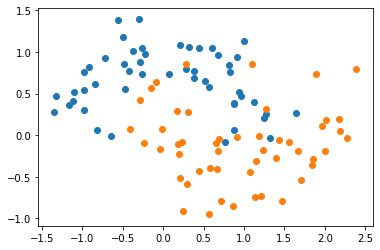

In [19]:
X, y = datasets.make_moons(noise=0.25, random_state=666)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

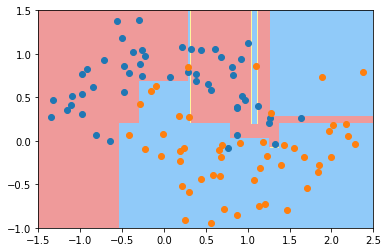

In [21]:
dt_clf = DecisionTreeClassifier() #不规定参数，将一直划分到基尼系数=0为止
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

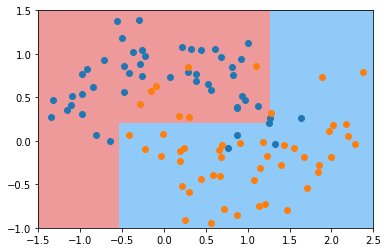

In [22]:
dt_clf = DecisionTreeClassifier(max_depth=2) #限制最大深度=2 
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

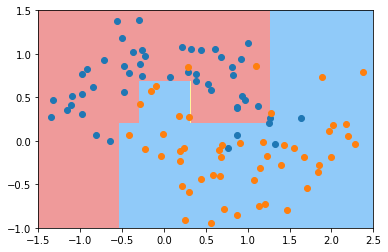

In [23]:
dt_clf = DecisionTreeClassifier(min_samples_split=10) #每个节点至少有10个样本数据才进行划分
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

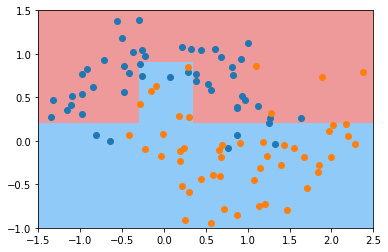

In [24]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6) #每个叶子结点至少有6个样本数据 
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

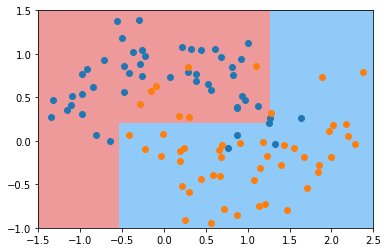

In [25]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=4) #最多有4个叶子结点
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

# 决策树解决回归问题

In [26]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.5756964313014042

In [28]:
dt_reg.score(X_train, y_train) 

1.0

**非常容易产生过拟合**

### 决策树的局限性
1. 划分线与坐标轴平行
2. 对个别样本点敏感
3. 高度依赖于调参